# Projeto 2 - Ciência dos Dados

Integrantes do grupo: Fernanda de Oliveira Pereira, Giovana Cassoni Andrade, Giselle Vieira de Melo, Guilherme dos Santos Martins e Marlon Silva Pereira.

## Introdução

### Objetivo

Esse projeto tem o propósito de prever uma variável principal (Target) em função de demais outras variáveis (Features) que podem influenciar em seu comportamento.

### Tema e Pergunta

Com o objetivo do projeto em mente, o grupo procurou um tema que atendesse aos requesitos e possuíse uma base de dados que permitisse responder a pergunta elaborada. Pensando no contexto atual em que o Brasil se encontra, tratando-se de uma pandemia, foi articulada uma pergunta.

Logo, através da pergunta, pretende-se prever uma informação numérica, com o target como um dado quantitativo e, consequentemente, os procedimentos aplicados serão técnicas descritas em Regressão.

## Minerando Dados e Características do Dataset

### Bibliotecas

O primeiro passo é importar todas as bibliotecas que serão utilizadas ao longo de todo o projeto.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, probplot

### Base de Dados

Em seguida, é armazenado o documento excel com a base dos dados que será usado em "filename" e acessado através da leitura do excel, guardado em "data_base".

In [2]:
filename = 'covid-data-brazil.xlsx'

In [3]:
data_base = pd.read_excel(filename)
data_base.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
3,BRA,South America,Brazil,2020-02-29,2,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
4,BRA,South America,Brazil,2020-03-01,2,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
5,BRA,South America,Brazil,2020-03-02,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
6,BRA,South America,Brazil,2020-03-03,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
7,BRA,South America,Brazil,2020-03-04,4,2.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
8,BRA,South America,Brazil,2020-03-05,4,0.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
9,BRA,South America,Brazil,2020-03-06,13,9.0,1.714,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


### Clean up

Aqui será filtrada a base de dados, fornecendo apenas as colunas que influenciam no nosso target, excluindo as colunas que mostram informações constantes da população e do país, como o número de indivíduos com doenças crônicas e o IDH, e as colunas que não afetam nossa análise.

Com esses apontamentos, na base de dados será utilizada as colunas: "total_cases", "total_deaths", "new_deaths" e "total_vaccinations", além da coluna do target "new_cases".

In [4]:
lista = ['total_cases','new_cases','total_deaths','new_deaths','total_vaccinations']
df = data_base.loc[:, lista]
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
0,1,1.0,NaN,NaN,NaN
1,1,0.0,NaN,NaN,NaN
2,1,0.0,NaN,NaN,NaN
3,2,1.0,NaN,NaN,NaN
4,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...
625,21939196,14598.0,610491.0,267.0,294219326.0
626,21953838,14642.0,611222.0,731.0,NaN
627,21957967,4129.0,611283.0,61.0,296865258.0
628,21960766,2799.0,611346.0,63.0,NaN


Esse outro filtro irá excluir as linhas que não possuem números nos dados (NaN), permitindo uma análise sem lacunas.

In [5]:
df = df.dropna()
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
325,8455059,61567.0,209296.0,1050.0,0.0
326,8488099,33040.0,209847.0,551.0,112.0
327,8511770,23671.0,210299.0,452.0,1109.0
328,8573864,62094.0,211491.0,1192.0,11470.0
329,8638249,64385.0,212831.0,1340.0,28543.0
...,...,...,...,...,...
623,21909298,12273.0,610036.0,280.0,280989164.0
624,21924598,15300.0,610224.0,188.0,282987544.0
625,21939196,14598.0,610491.0,267.0,294219326.0
627,21957967,4129.0,611283.0,61.0,296865258.0


### Análise descritiva

Nessa etapa será feita uma análise descritiva das variáveis para compreender como cada uma das features se comporta juntamente à variável target.

In [6]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
count,2.420000e+02,242.000000,242.000000,242.000000,2.420000e+02
mean,1.607327e+07,46658.590909,436257.380165,1397.140496,9.559905e+07
std,4.419430e+06,26911.279407,138022.762996,948.427743,8.867244e+07
min,8.455059e+06,-573.000000,209296.000000,0.000000,0.000000e+00
25%,1.206815e+07,24654.000000,296237.750000,654.750000,1.438972e+07
50%,1.658502e+07,43274.000000,463995.000000,1212.500000,6.786347e+07
75%,2.032388e+07,70025.750000,568028.000000,2023.250000,1.620077e+08
max,2.196568e+07,115228.000000,611478.000000,4249.000000,2.971040e+08


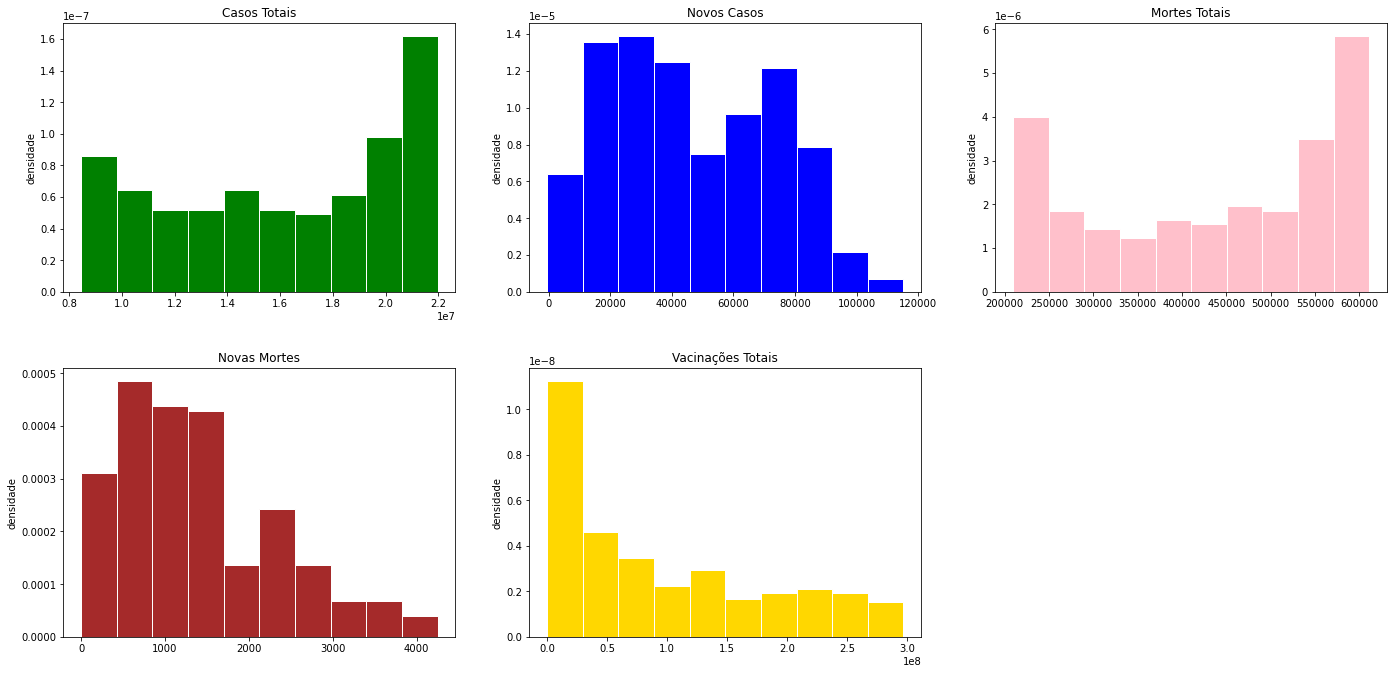

In [7]:
figure = plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.hist(df.total_cases, edgecolor='white', color='green',density=True)
plt.title('Casos Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 2)
plt.hist(df.new_cases, edgecolor='white', color='blue', density=True)
plt.title('Novos Casos')
plt.ylabel('densidade')


plt.subplot(2, 3, 3)
plt.hist(df.total_deaths, edgecolor='white', color='pink', density=True)
plt.title('Mortes Totais')
plt.ylabel('densidade')


plt.subplot(2, 3, 4)
plt.hist(df.new_deaths, edgecolor='white', color='brown', density=True)
plt.title('Novas Mortes')
plt.ylabel('densidade')


plt.subplot(2, 3, 5)
plt.hist(df.total_vaccinations, edgecolor='white', color='gold', density=True)
plt.title('Vacinações Totais')
plt.ylabel('densidade')

figure.tight_layout(pad=3.0)
plt.show()

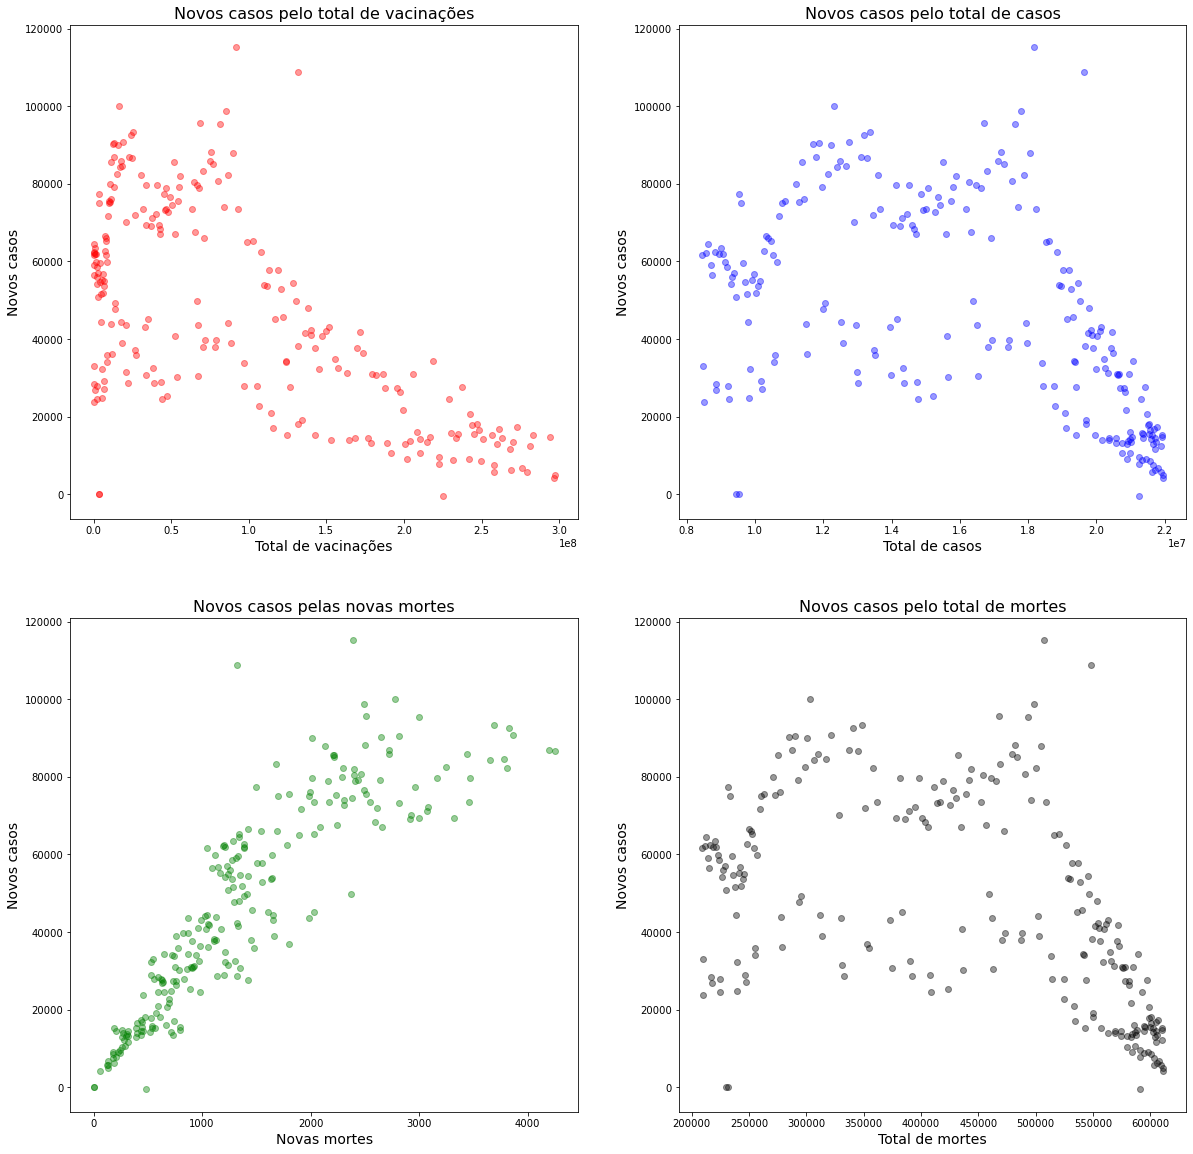

In [8]:
figure = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.scatter(df.total_vaccinations, df.new_cases, c='red', alpha=0.4)
plt.title('Novos casos pelo total de vacinações', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 2)
plt.scatter(df.total_cases, df.new_cases, c='blue', alpha=0.4)
plt.title('Novos casos pelo total de casos', fontsize=16)
plt.xlabel('Total de casos', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 3)
plt.scatter(df.new_deaths, df.new_cases, c='green', alpha=0.4)
plt.title('Novos casos pelas novas mortes', fontsize=16)
plt.xlabel('Novas mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

plt.subplot(2, 2, 4)
plt.scatter(df.total_deaths, df.new_cases, c='black', alpha=0.4)
plt.title('Novos casos pelo total de mortes', fontsize=16)
plt.xlabel('Total de mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)
plt.show()


In [9]:
sigma2 = df.var()
sigma2 = sigma2.to_list()
sigma2

[19531362700393.52,
 724216959.2966803,
 19050283105.03328,
 899515.1834985076,
 7862802479839525.0]

In [10]:
df_cov = df.cov()
df_cov.new_cases

total_cases          -5.853312e+10
new_cases             7.242170e+08
total_deaths         -1.779319e+09
new_deaths            2.241191e+07
total_vaccinations   -1.544761e+12
Name: new_cases, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8)

In [12]:
def Regressão(Y, X):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

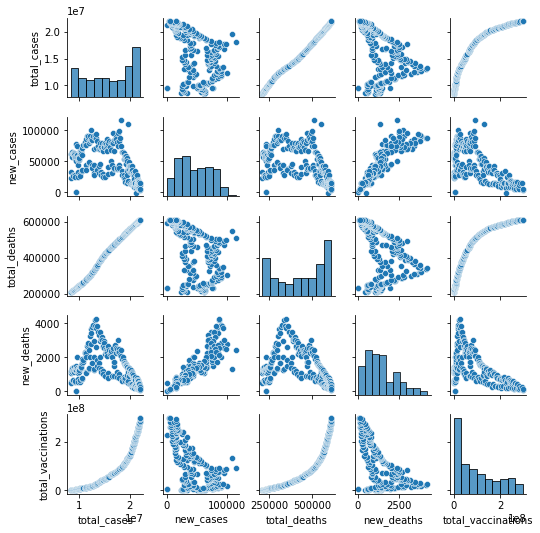

In [13]:
sns.pairplot(df, height=1.5)
plt.show()

In [14]:
X = train[['total_vaccinations', 'new_deaths', 'total_deaths','total_cases']]
Y = train['new_cases']
results = Regressão(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     174.9
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           3.21e-62
Time:                        20:57:27   Log-Likelihood:                -2090.2
No. Observations:                 193   AIC:                             4190.
Df Residuals:                     188   BIC:                             4207.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.514e+04   1.36e+04      1.843      0.067   -1771.391    5.21e+04
total_vaccinations -5.832e-05   3.84e-05     -1.520      0.130      -0.000    1.74e-05
new_deaths            22.2493      1.306     17.038      0.000      19.673      24.825
total_deaths           0.0350      0.134      0.261      0.795      -0.230       0.300
total_cases           -0.0012      0.005     -0.263      0.793      -0.010       0.008
==============================================================================
Omnibus:                       46.642   Durbin-Watson:                   2.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.954
Skew:                           0.904   Prob(JB):                     5.58e-37
Kurtosis:                       7.183   Cond. No.                     1.93e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X1 = train[['total_vaccinations', 'new_deaths', 'total_deaths']]
Y1 = train['new_cases']
results1 = Regressão(Y1,X1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     234.4
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.00e-63
Time:                        20:57:27   Log-Likelihood:                -2090.2
No. Observations:                 193   AIC:                             4188.
Df Residuals:                     189   BIC:                             4201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.178e+04   4774.320      4.561      0.000    1.24e+04    3.12e+04
total_vaccinations -6.432e-05   3.08e-05     -2.088      0.038      -0.000   -3.56e-06
new_deaths            22.1826      1.278     17.358      0.000      19.662      24.703
total_deaths       -7.708e-05      0.017     -0.004      0.996      -0.034       0.034
==============================================================================
Omnibus:                       46.275   Durbin-Watson:                   2.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.176
Skew:                           0.899   Prob(JB):                     2.24e-36
Kurtosis:                       7.145   Cond. No.                     6.73e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X2 = train[['total_vaccinations', 'new_deaths']]
Y2 = train['new_cases']
results2 = Regressão(Y2,X2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     353.4
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           9.39e-65
Time:                        20:57:27   Log-Likelihood:                -2090.2
No. Observations:                 193   AIC:                             4186.
Df Residuals:                     190   BIC:                             4196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.176e+04   2532.774      8.591      0.000    1.68e+04    2.68e+04
total_vaccinations -6.445e-05   1.22e-05     -5.283      0.000   -8.85e-05   -4.04e-05
new_deaths            22.1801      1.148     19.326      0.000      19.916      24.444
==============================================================================
Omnibus:                       46.260   Durbin-Watson:                   2.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.068
Skew:                           0.899   Prob(JB):                     2.36e-36
Kurtosis:                       7.144   Cond. No.                     3.58e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

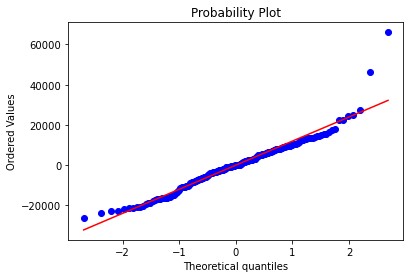

In [17]:
plt.figure()
probplot(results2.resid, dist = 'norm', plot = plt);

In [18]:
beta0_hat = results.params[0]  # const
beta1_hat = results.params[1]  # total_vaccinations
beta2_hat = results.params[2]  # new_deaths

In [19]:
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [20]:
npoints = 100
feature1 = X["total_vaccinations"]
feature2 = X["new_deaths"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [21]:
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [22]:
fit_z = f(eixo_x, eixo_y)

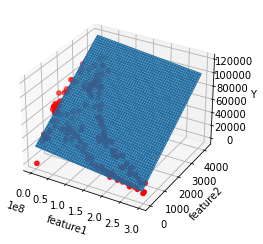

In [23]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

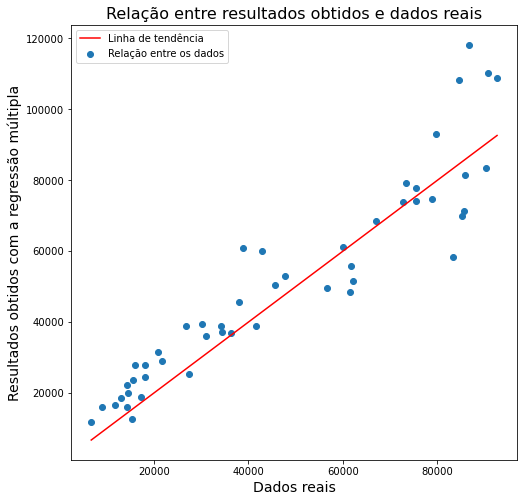

In [74]:
Y_test = []
Y_data = test.new_cases.to_list()
p_1 = test.total_vaccinations.to_list()
p_2 = test.new_deaths.to_list()
for i in range(len(p_1)):
    Y_test.append(f(p_1[i], p_2[i]))

plt.figure(figsize = (8,8))
x_reta = [min(Y_data), max(Y_data)]
plt.scatter(Y_data, Y_test, label = 'Relação entre os dados')
plt.plot(x_reta, x_reta, color = 'r', label = 'Linha de tendência')
plt.title("Relação entre resultados obtidos e dados reais", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a regressão múltipla", fontsize=14)
plt.legend()
plt.show()


In [75]:
Resultados = test['new_cases']
Resultados = Resultados.to_frame()
Resultados['new_cases_data'] = Y_test
corr_tab = Resultados.corr()
corr_results = corr_tab.loc['new_cases_data','new_cases']
print('A correlação entre os valores obtidos para a base de dados de teste com a regressão múltipla e os valores já existes\napresentam uma correlação de {0:.4f}, que se aproxima muito de 1, indicando uma boa acurácia do modelo.'.format(corr_results))

A correlação entre os valores obtidos para a base de dados de teste com a regressão múltipla e os valores já existes
apresentam uma correlação de 0.9329, que se aproxima muito de 1, indicando uma boa acurácia do modelo.


### Referências

- https://ourworldindata.org/covid-deaths